In [206]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import LoadAnnotationFunction as laf
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [226]:
dataDir='../data'
dataType='train_482_classes_updated'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)
print(annFile)

../data/annotations/train_482_classes_updated.json


In [227]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.93s)
creating index...
index created!


In [228]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
aerosol_can airplane apricot apron armchair trash_can ashtray atomizer ax baby_buggy backpack handbag suitcase bagel bagpipe ball balloon banana bandage banner barbell barrow baseball_bat baseball_glove basket basketball_hoop basketball bath_mat beaker beanie bear bed bedspread cow beeper beer_can bell bell_pepper bench bib bicycle binder binoculars bird birdfeeder birdcage birdhouse biscuit_(bread) black_sheep blanket blender gameboard boat book book_bag booklet bottle bottle_opener bouquet bow_(weapon) bowl bracelet briefcase broom bucket bull bun buoy bus_(vehicle) business_card butcher_knife cab_(taxi) cabinet calendar calf camcorder camel camera can candle canister canoe canteen bottle_cap cape car_(automobile) railcar_(part_of_a_train) car_battery card cardigan carrot tote_bag cart carton cat cellular_telephone chain_mail chair chicken_(animal) crisp_(potato_chip) chocolate_bar chopping_board chopstick cigar_box cigarette cigarette_case clip clipboard clock clot

In [253]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['baby']);
imgIds = coco.getImgIds(catIds=catIds);
print(len(catIds))
print(len(imgIds))
if len(imgIds) != 0:
    print("There are ", len(imgIds), " images for this category.")
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    print(img)
    img_videotitle = img['video']
    print("test",img['file_name'])
else:
    print("There are 0 images for this category.")

1
12996
There are  12996  images for this category.
{'id': 73082, 'video': 'train/LaSOT/helmet-1', '_scale_task_id': '5dad5fed4faf0e36e379751b', 'width': 1280, 'height': 720, 'file_name': 'train/LaSOT/helmet-1/00000811.jpg', 'frame_index': 810, 'license': 0, 'video_id': 1923, 'frame_id': 26, 'neg_category_ids': [1078, 1072, 24, 365, 188, 887, 1057], 'not_exhaustive_category_ids': []}
test train/LaSOT/helmet-1/00000811.jpg


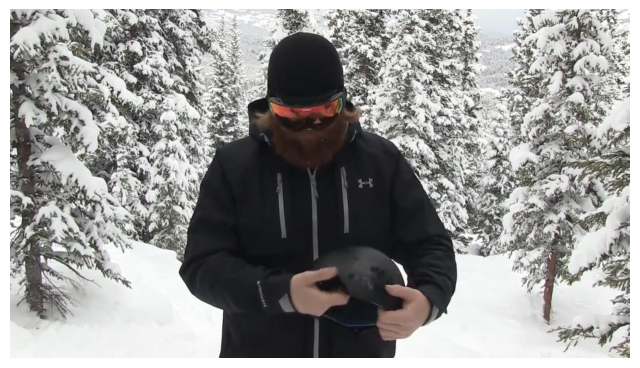

In [254]:
# load and display image

dataDir='../data/tao_train/frames'

I = io.imread('%s/%s'%(dataDir,img['file_name']))

plt.axis('off')
plt.imshow(I)
plt.show()

ImgID:  73082
AnnotationID:  [270994]
Annotations:  [{'segmentation': [[348, 47, 924, 47, 924, 720, 348, 720]], 'bbox': [348.0, 47.0, 576.0, 673.0], 'area': 387648, 'iscrowd': 0, 'id': 270994, 'image_id': 73082, 'category_id': 805, 'track_id': 12156, '_scale_uuid': '8a1a63e5-5f55-41ac-b3e4-32f83f7ec689', 'scale_category': 'person', 'video_id': 1923, 'instance_id': 12156}]


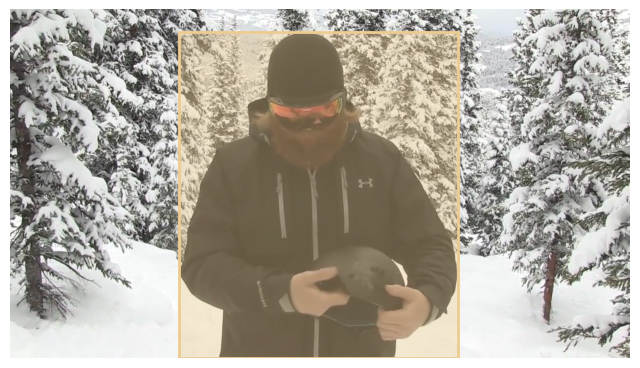

In [255]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
print("ImgID: ",img['id'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd= None)
print("AnnotationID: ",annIds)
anns = coco.loadAnns(annIds)
print("Annotations: ",anns)
coco.showAnns(anns)
